In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
os.chdir("C:/Users/Aleksandr/Desktop/CSC/Data Analysis/lab 1/Shad_AD on Python_1_01/задача_леденцы/")

In [3]:
os.listdir(path=".")

['Леденцы.dat', 'Леденцы_описание.doc']

In [4]:
df = pd.read_csv("Леденцы.dat", sep=';', engine='python')

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

In [7]:
type(link)
link.shape

(337, 4)

In [8]:
link

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

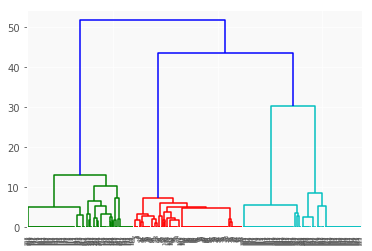

In [9]:
# Функция для построения дендрограммы
#  Пороговое значение определяется как 0.7*max(Z[:,2]).
dn = dendrogram(link)

Построение дендрограммы без дополнительных указаний дает грубое разбиение на кластеры, поэтому остановимся здесь подробнее

In [10]:
dist = link[:, 2]

На графике каменистой осыпи (ниже) представлены не все слияния. Рассмотрены только последние слияния, для лучшей оценки разбиения.

Text(11, 12, '5 clusters')

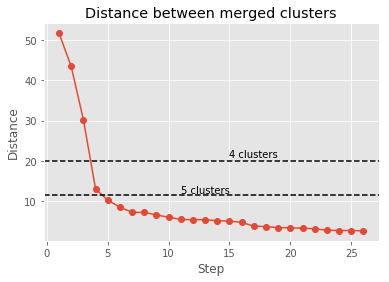

In [11]:
dist_rev = dist[:310:-1]
#idxs = range(1, len(dist)+1)
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(20, c='k', linestyle='dashed')
plt.axhline(11.5, c='k', linestyle='dashed')
plt.text(15, 21, '4 clusters')
plt.text(11, 12, '5 clusters')

Из графика видно, что место "сгиба" локтя нужно выбрать либо при 4х кластерах, либо при 5ти. Построем и то и другое разбиение и выберем наиболее осмысленное

In [12]:
# Останавливаем объединение, если расстояние между кластерами превышает 12 (т.е. 5 кластеров)
df['cluster'] = fcluster(link, 12, criterion='distance')

In [13]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.932203,4.830508,4.898305
2,2.612245,2.632653,2.489796,2.163265,2.142857,2.081633,2.448980,2.816327,4.979592,4.795918,4.816327
3,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
5,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


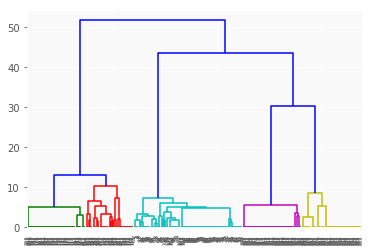

In [14]:
# Функция для построения дендрограммы
#  Пороговое значение равно 12.
dn = dendrogram(link, color_threshold = 12)

из таблицы средних значений df видно, что кластеры 1 и 2 качественно не отличаются. Это подтверждает и изображение дендрограммы. Поэтому логичным будет выбор 4х кластеров для исследования.

In [15]:
# Останавливаем объединение, если расстояние между кластерами превышает 21 (т.е. 4 кластера)
df['cluster'] = fcluster(link, 21, criterion='distance')

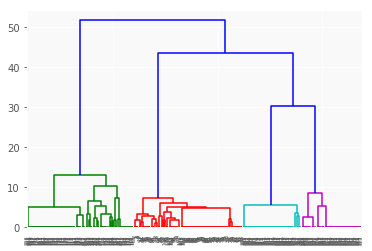

In [16]:
# Функция для построения дендрограммы
#  Пороговое значение определяется как 21).
dn = dendrogram(link, color_threshold = 21)

In [17]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Из таблицы средних значений можно сделать предположение о группах опрошенных людей:

[1]  - это те, кто используют леденцы из-за проблем со здоровьем. Боль в горле, заложенность носа, и просто улучшение самочувствия. 

[2] - Люди, имеющие неприятных запах изо рта и переживающие на этот счет. Сюда попали все, кто сосут леденцы, чтобы освежить дыхание, стараются избавиться от плохого запаха и беспокоются на этот счет

[3] - Умники, те, кому нужно сосать леденец, чтобы сконцентрироваться и подумать

[4] - Сладкоежки. Едят леденцы, потому что любят сладости.

In [18]:
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

По приведенным данным видно, что число потребителей леденцов из-за здоровья и для приятного запаха рта вдвое превышает число тех, кто ест их, потому что любит сладкое или это помогает отвлечься от окружения и сконцентрироваться. Поэтому ориентация на эти направления может быть наиболее выгодна.